In [4]:
from config import config_path
from getPatientRecord import get_current_goals
from graph_suggestion import graph_sugg
from search_medline import SearchMedline
from searching_ES import SearchES
config = config_path()
import os
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import pandas as pd

# Step 1: recording the consultation

## In particular, the diagnosis is recorded and the best matches from the database are selected so the doctor can pick one:

In [2]:
%run speech2text.py

Prediabetes
Diabetic retinopathy associated with type II diabetes mellitus (disorder)
Neuropathy due to type 2 diabetes mellitus (disorder)
Nonproliferative diabetic retinopathy due to type 2 diabetes mellitus (disorder)
Microalbuminuria due to type 2 diabetes mellitus (disorder)
Proteinuria due to type 2 diabetes mellitus (disorder)
Macular edema and retinopathy due to type 2 diabetes mellitus (disorder)
Proliferative diabetic retinopathy due to type II diabetes mellitus (disorder)


**Let's assume it's 'Neuropathy due to type 2 diabetes mellitus (disorder)'**

In [3]:
with open(config.transcript_D, 'w') as f:
    f.write('Neuropathy due to type 2 diabetes mellitus (disorder)')

# Step 2: get diagnosis suggestions related to this one (and the patient's history)

In [4]:
suggestions = graph_sugg()

print("The suggested diagnosis are: \n%s" %suggestions)

The suggested diagnosis are: 
Chronic sinusitis (disorder)
Polyp of colon
Coronary Heart Disease
Recurrent rectal polyp
Overlapping malignant neoplasm of colon
Seizure disorder
History of single seizure (situation)
Epilepsy
Prediabetes
Osteoporosis (disorder);


In [5]:
g = nx.read_gexf("Diagnoses/clusters.gexf")

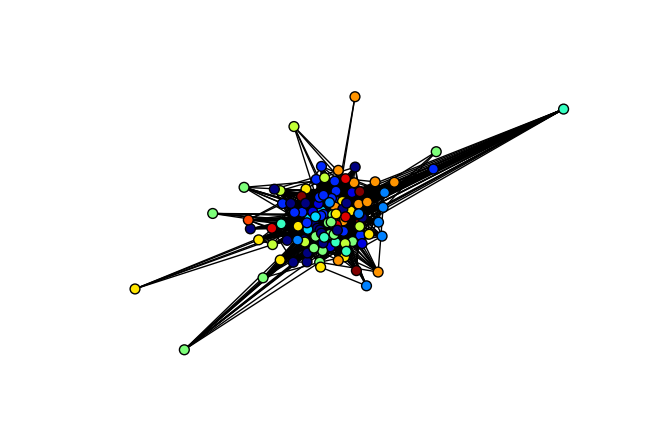

In [6]:
pos = nx.spring_layout(g)
nx.draw(g, pos, node_size=50, node_color=list(nx.get_node_attributes(g, "cluster").values()))

In [7]:
df_clusters = pd.read_csv("Diagnoses/df_clusters.csv")

In [11]:
df_clusters[df_clusters["cluster"] == 2]

,Unnamed: 0,code,display,cluster
2,437,53741008,Coronary Heart Disease,2
21,4606,22298006,Myocardial Infarction,2
22,4644,399211009,History of myocardial infarction (situation),2
35,5336,403191005,Second degree burn,2
36,5349,44054006,Diabetes,2
38,5459,127013003,Diabetic renal disease (disorder),2
39,5498,422034002,Diabetic retinopathy associated with type II d...,2
40,5532,368581000119106,Neuropathy due to type 2 diabetes mellitus (di...,2
64,6402,1551000119108,Nonproliferative diabetic retinopathy due to t...,2
65,6426,90781000119102,Microalbuminuria due to type 2 diabetes mellit...,2


## Also, a useful reminder of the patient's current goals:

In [7]:
goals = get_current_goals()

In [8]:
print(goals)

Glucose [Mass/volume] in Blood < 108
Maintain blood pressure below 140/90 mmHg
Hemoglobin A1c total in Blood < 7.0
Improve and maintenance of optimal foot health: aim at early detection of peripheral vascular problems and neuropathy presumed due to diabetes; and prevention of diabetic foot ulcer, gangrene
Address patient knowledge deficit on diabetic self-care;


# Step 3: Get related research papers, from both Medline and our own search engine

In [5]:
medline = SearchMedline(n_results=5).Medline()
ES = SearchES(n_results=5).Search()

## Medline

In [6]:
print(medline)

1. Diabetes Type 1, National Library of Medicine, https://medlineplus.gov/diabetestype1.html
2. Diabetes Type 2, National Library of Medicine, https://medlineplus.gov/diabetestype2.html
3. Diabetes, National Library of Medicine, https://medlineplus.gov/diabetes.html
4. Diabetes and Pregnancy, National Library of Medicine, https://medlineplus.gov/diabetesandpregnancy.html
5. Diabetes in Children and Teens, National Library of Medicine, https://medlineplus.gov/diabetesinchildrenandteens.html;


## ElasticSearch + TPP Database

In [21]:
print(ES)

Similar research papers by our own engine: 
searchES:0. Cranial diabetes insipidus with pituitary stalk lesions., 10.1093/qjmed/hcw052
1. Geraniol improves the impaired vascular reactivity in diabetes and metabolic syndrome through calcium channel blocking effect., 10.1016/j.jdiacomp.2016.04.006
2. Altered joint moment strategy during stair walking in diabetes patients with and without peripheral neuropathy., 10.1016/j.gaitpost.2016.03.007
3. Prediction of insulin resistance in type 2 diabetes mellitus using routinely available clinical parameters., 10.1016/j.dsx.2016.03.002
4. Glycemic Control and Urinary Tract Infections in Women with Type 1 Diabetes: Results from the DCCT/EDIC., 10.1016/j.juro.2016.04.071;
